In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Načítanie datasetu mushrooms.csv a zobrazenie prvých 5 prvkov datasetu
dataset = pd.read_csv('Dataset/mushrooms.csv')
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Overenie či sa nenachádza prázdna hodnota v datasete
display(dataset.isnull().any())


class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [4]:
# Získanie počtu riadkov datasetu a výpis prvého riadku datasetu
total_size = dataset['class'].count()
print("Počet riadkov datasetu: "+ str(total_size))

print("\nVýpis prvého riadku:")
print(dataset.iloc[0])

Počet riadkov datasetu: 8124

Výpis prvého riadku:
class                       p
cap-shape                   x
cap-surface                 s
cap-color                   n
bruises                     t
odor                        p
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  k
stalk-shape                 e
stalk-root                  e
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  s
habitat                     u
Name: 0, dtype: object


In [5]:
# Dataset rozdelíme na dáta závislé [premenná druh] a dáta nezávislé [premenná data]
druh = dataset['class']
data = dataset.iloc[:,1:]

# Pri pozorovaní nášho datasetu, môžeme vyvodiť záver, že dataset ma kategorické údaje a preto je potrebné previesť ich na numerický formát
druh = druh.replace(to_replace=["e","p"],value=[0,1]) # kategória druh odzrkadluje či je huba jedlá (e-edible) alebo jedovatá (p-poisonous). Jedlú hubu sme nahradili 0 a jedovatú 1.
data = pd.get_dummies(data) # premena kategorických údajov na numerický fromát

# Výpis stĺpca druhu húb nahradením 'e', 'p' za '0','1'
print(druh[:5])

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64


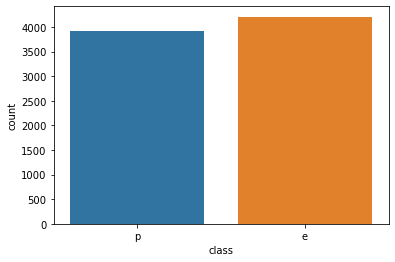

In [6]:
# Grafové zobrazenie jedlých(e) a jedovatých húb(p)
sns.countplot(x='class',data=dataset)

In [7]:
# Výpis ostatných dát pre prehladnosť sme dali vypísať prvých 5 záznamov
print('Ostatné dáta:\n', data[:5])

Ostatné dáta:
    cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0  ...             1 

In [8]:
# Korelácia [druh a data], vytvorenie matrixu
data["result"] = druh
correlation_matrix = data.corr()
display(correlation_matrix.head())

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,result
cap-shape_b,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,0.117712,-0.027947,...,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764,-0.182567
cap-shape_c,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,-0.015038,0.015893,...,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453,0.023007
cap-shape_f,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,-0.093397,0.029076,...,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450,0.018526
cap-shape_k,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,0.137988,0.015261,...,0.172707,-0.170081,-0.089230,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003,0.163565
cap-shape_s,-0.015264,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,0.099464,-0.001396,-0.042607,-0.051272,...,0.000341,0.044603,-0.050018,-0.037702,-0.021242,-0.012142,-0.025458,0.288697,-0.009784,-0.060664


In [9]:
# Získanie stĺpcov, ktorých kolerácia so závislými dátami (druh) je väčšia ako 0.5 a uloženie do premennej columns 
columns=[]
for column,value in zip(correlation_matrix.loc["result"].index,correlation_matrix.loc["result"]):
    if(abs(value)>0.5):
        columns.append(column)
data = data[columns]


In [10]:
# Získanie údajov X a y potrebné na vykonanie testov
# 33% dát pouzitých na testovanie
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

print('Premenná X:\n',X[:2]) # Výpis prvých 3 riadkov premennej X
print('\nPremenná y:\n',y[:5]) # Výpis prvých 5 riadkov premmenej y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Premenná X:
    bruises_f  bruises_t  odor_f  odor_n  gill-size_b  gill-size_n  \
0          0          1       0       0            0            1   
1          0          1       0       0            1            0   

   gill-color_b  stalk-surface-above-ring_k  stalk-surface-below-ring_k  \
0             0                           0                           0   
1             0                           0                           0   

   ring-type_p  
0            1  
1            1  

Premenná y:
 0    1
1    0
2    0
3    1
4    0
Name: result, dtype: int64


In [11]:
# Výpis počtu prvkov pre kontrolu správnosti funkčnosti. V prvom prípade 33% dát použitých na testovanie
print('Celkový počet prvkov: ',len(y))
print('Prvy na trénovanie: ',len(y_train))
print('Prvky na testovanie: ',len(y_test))



Celkový počet prvkov:  8124
Prvy na trénovanie:  5443
Prvky na testovanie:  2681


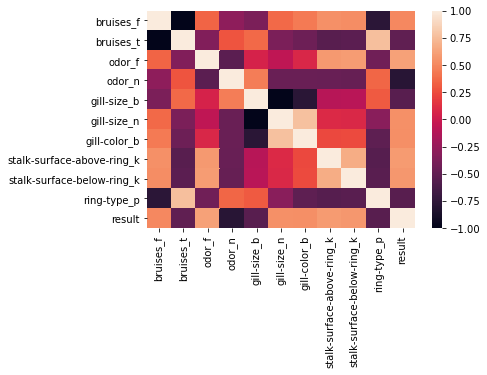

In [12]:
sns.heatmap(data.corr(),annot=False)

In [13]:
# Vytvorenie neurónovej siete Keras s 2 vrstvami a 50 neuronmi. Model sequential
model = Sequential()
# Aktivačnú funkciu som si zvolil Relu - je menej náročná na výpočty a účinejšia na medzivrstvy
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
# Sigmoid je použitý na výstup, pretože klasifikuje dáta na základe suvislých hodnôt 0 a 1
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
scores = model.fit(X_train, y_train, batch_size=100, epochs=10, validation_split=0.2)

Train on 4354 samples, validate on 1089 samples
Epoch 1/10
4354/4354 [==============================] - 1s 154us/step - loss: 0.4352 - accuracy: 0.8323 - val_loss: 0.2327 - val_accuracy: 0.9219
Epoch 2/10
4354/4354 [==============================] - 0s 13us/step - loss: 0.1625 - accuracy: 0.9685 - val_loss: 0.1113 - val_accuracy: 0.9807
Epoch 3/10
4354/4354 [==============================] - 0s 13us/step - loss: 0.1081 - accuracy: 0.9775 - val_loss: 0.0883 - val_accuracy: 0.9807
Epoch 4/10
4354/4354 [==============================] - 0s 13us/step - loss: 0.0967 - accuracy: 0.9775 - val_loss: 0.0814 - val_accuracy: 0.9807
Epoch 5/10
4354/4354 [==============================] - 0s 12us/step - loss: 0.0903 - accuracy: 0.9775 - val_loss: 0.0767 - val_accuracy: 0.9807
Epoch 6/10
4354/4354 [========

In [14]:
# Výpis výsledku trénovania
print("Presnosť trénovania: %.2f%% / Validácia trénovania presnosti: %.2f%%" %
      (100*scores.history['accuracy'][-1], 100*scores.history['val_accuracy'][-1]))



Presnosť trénovania: 97.77% / Validácia trénovania presnosti: 98.07%


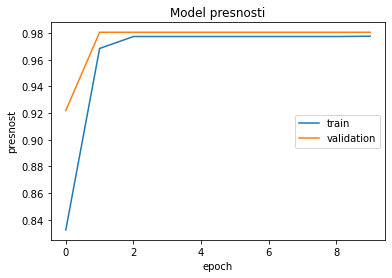

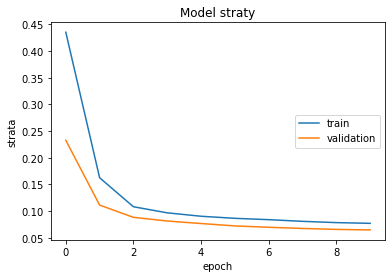

In [15]:
plt.plot(scores.history['accuracy'])
plt.plot(scores.history['val_accuracy'])

plt.title('Model presnosti')
plt.ylabel('presnost')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='center right')
plt.show()

plt.plot(scores.history['loss'])
plt.plot(scores.history['val_loss'])

plt.title('Model straty')
plt.ylabel('strata')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='center right')
plt.show()

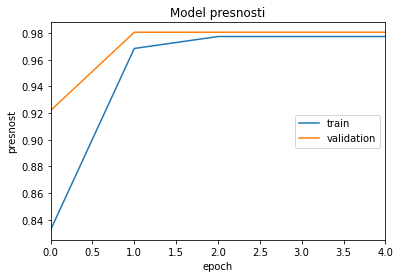

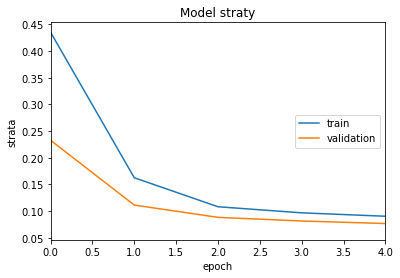

In [16]:
# Zmena x - súradnice na interval (0-4)
plt.plot(scores.history['accuracy'])
plt.plot(scores.history['val_accuracy'])

plt.title('Model presnosti')
plt.ylabel('presnost')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='center right')
plt.xlim(0,4)
plt.show()

plt.plot(scores.history['loss'])
plt.plot(scores.history['val_loss'])

plt.title('Model straty')
plt.ylabel('strata')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='center right')
plt.xlim(0,4)
plt.show()

In [17]:
# Model 2 - Počet neurónov je polovičný oproti predošlému príkladu (25), model rovnaký Sequntial
# Aktivačná funkcia je už hard_sigmoid - funkcia aktivácie tvrdého sigmoidu, ktorá je rýchlejšia na výpočet ako sigmoid
model = Sequential()
model.add(Dense(25, input_dim=X_train.shape[1], activation='hard_sigmoid'))
model.add(Dense(25, activation='hard_sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Optimizer Adagrad. Adagrad je optimalizátor so špecifickými parametrami učenia, ktoré sa prispôsobujú podľa toho ako často sa parameter aktualizuje podľa treningu.Čím viac aktualizácií dostava tým je menšia miera učenia
model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
scores = model.fit(X_train, y_train, batch_size=100, epochs=10, validation_split=0.2)



Train on 4354 samples, validate on 1089 samples
Epoch 1/10
4354/4354 [==============================] - 0s 44us/step - loss: 0.6261 - accuracy: 0.7963 - val_loss: 0.5500 - val_accuracy: 0.8806
Epoch 2/10
4354/4354 [==============================] - 0s 11us/step - loss: 0.4829 - accuracy: 0.9120 - val_loss: 0.4205 - val_accuracy: 0.9091
Epoch 3/10
4354/4354 [==============================] - 0s 11us/step - loss: 0.3712 - accuracy: 0.9109 - val_loss: 0.3349 - val_accuracy: 0.8981
Epoch 4/10
4354/4354 [==============================] - 0s 11us/step - loss: 0.3042 - accuracy: 0.9141 - val_loss: 0.2852 - val_accuracy: 0.9091
Epoch 5/10
4354/4354 [==============================] - 0s 11us/step - loss: 0.2646 - accuracy: 0.9132 - val_loss: 0.2543 - val_accuracy: 0.8981
Epoch 6/10
4354/4354 [==========

In [18]:
print("Presnosť trénovania modelu 2: %.2f%% / Validácia trénovania presnosti modelu 2: %.2f%%" %
      (100*scores.history['accuracy'][-1], 100*scores.history['val_accuracy'][-1]))

Presnosť trénovania modelu 2: 93.39% / Validácia trénovania presnosti modelu 2: 92.75%


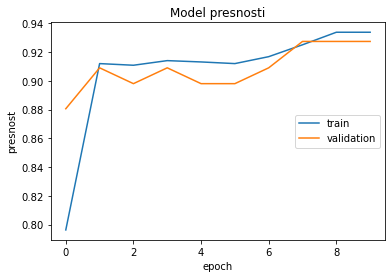

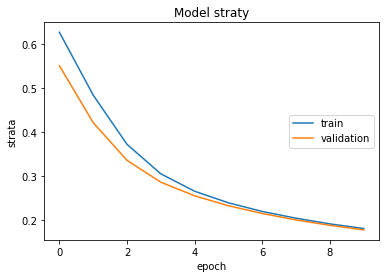

In [19]:
plt.plot(scores.history['accuracy'])
plt.plot(scores.history['val_accuracy'])

plt.title('Model presnosti')
plt.ylabel('presnost')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='center right')
plt.show()

plt.plot(scores.history['loss'])
plt.plot(scores.history['val_loss'])

plt.title('Model straty')
plt.ylabel('strata')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='center right')
plt.show()



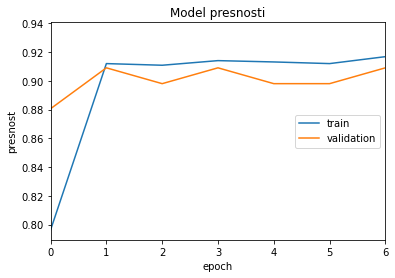

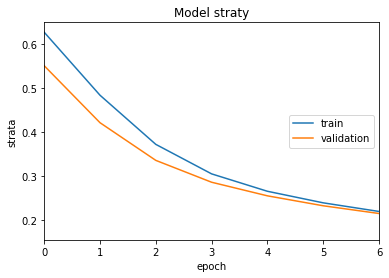

In [20]:
# Zmena x - súradnice na interval (0-4)
plt.plot(scores.history['accuracy'])
plt.plot(scores.history['val_accuracy'])

plt.title('Model presnosti')
plt.ylabel('presnost')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='center right')
plt.xlim(0,6)
plt.show()

plt.plot(scores.history['loss'])
plt.plot(scores.history['val_loss'])

plt.title('Model straty')
plt.ylabel('strata')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='center right')
plt.xlim(0,6)
plt.show()

In [21]:
# Väčšia vzorka dát ako v predošlých modeloch. Konkrétne 80% dát použitých na testovanie
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

